https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("./data/CC/CC GENERAL.csv")

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Preparando los datos

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.isnull().sum().sort_values(ascending=False).head(3)

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
TENURE                0
dtype: int64

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df = df.drop('CUST_ID', axis = 1)
df = df.astype(np.float64)
df = df.fillna(method ='ffill') 

In [7]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending=False).head(3)

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
dtype: int64

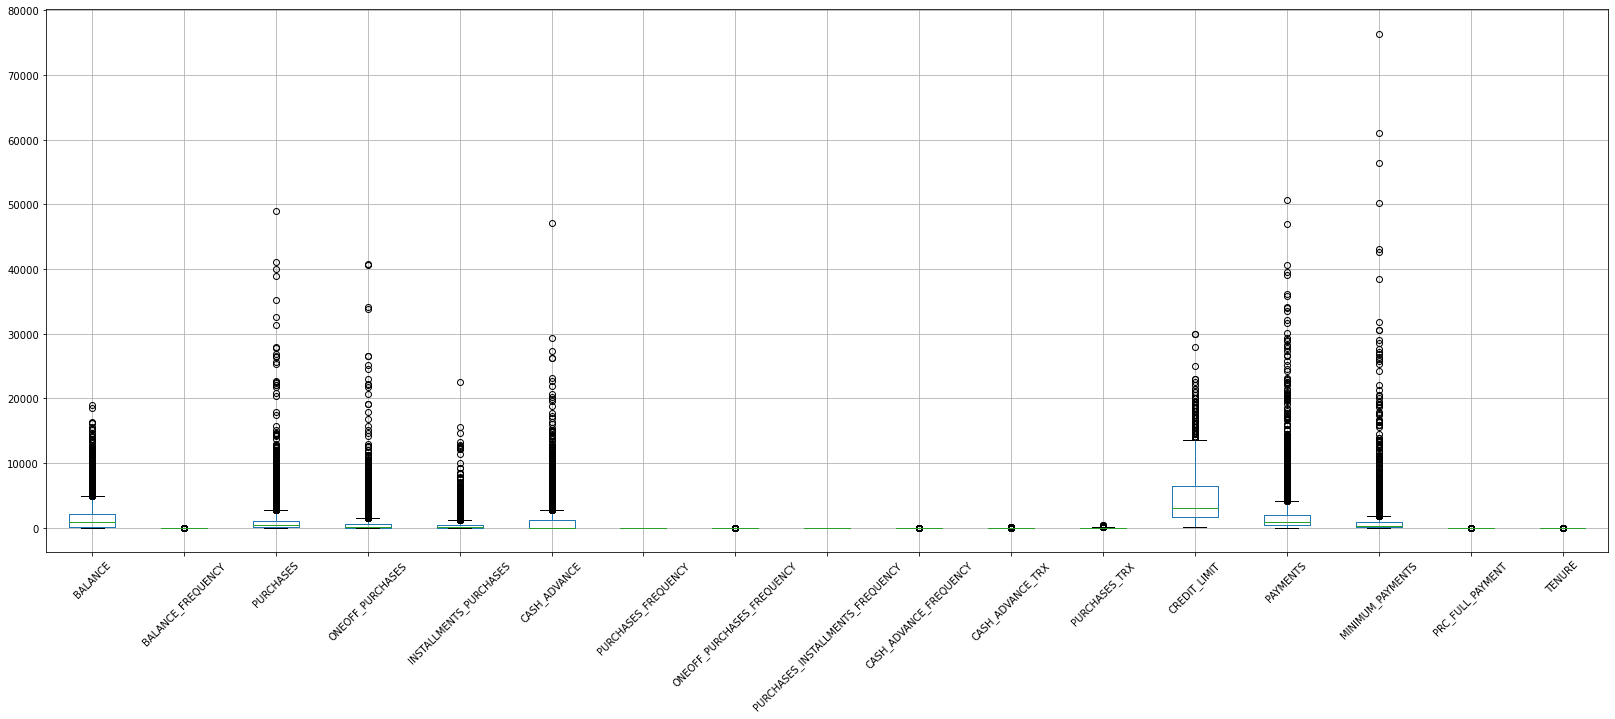

In [9]:
df.boxplot(figsize=(28,10))
plt.xticks(rotation=45);

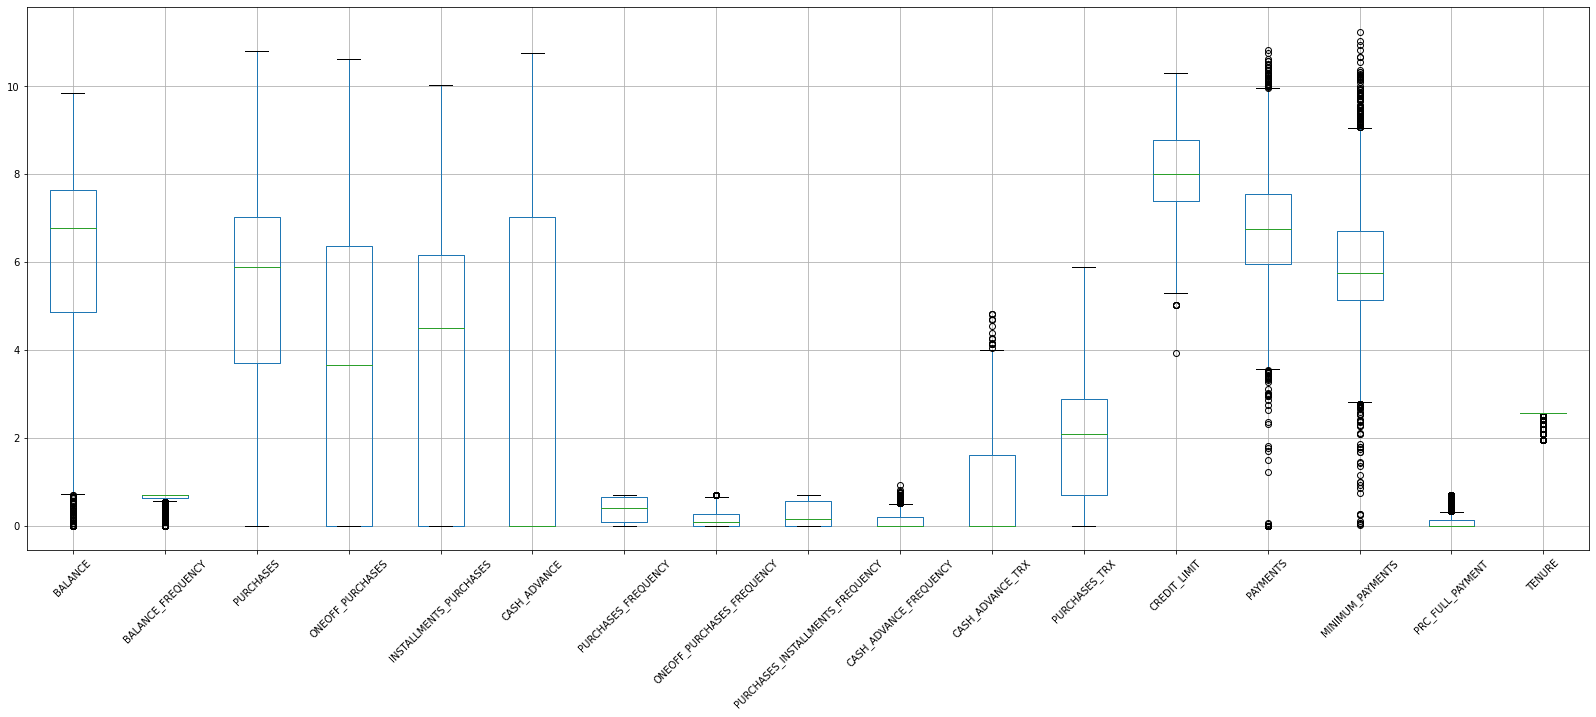

In [10]:
# Graficar con escala logaritmica para mejor visualizacion
np.log(1+df).boxplot(figsize=(28,10))
plt.xticks(rotation=45);

In [11]:
from sklearn.preprocessing import StandardScaler,normalize
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

In [12]:
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


## Clustering

<p style='text-align: justify;'>El <b>clustering</b> es una técnica que busca identificar de manera automática diferentes agrupaciones (clústeres) de elementos dependiendo de la similitud que exista entre ellos. El objetivo fundamental de las técnicas de clustering es la de identificar diversos grupos donde la similitud entre los miembros del mismo grupo sea alta y la similitud con los miembros de otros grupos sea baja.</p> 
<center><img src="img/Clustering.png" width = "60%"></center>

<p style='text-align: justify;'>Existen múltiples algoritmos de clustering, pero a continuación se presenta un esquema donde se observan cuatro tipos de algoritmos de clustering diferentes.</p> 
<center><img src="img/Algoritmos.png" width = "80%"></center>

https://developers.google.com/machine-learning/clustering/clustering-algorithms

## K-Means

<p style='text-align: justify;'>El algoritmo de K-Means es un algoritmo de Clustering basado en Centroides que agrupa diversos elementos en k grupos basándose en la similitud de las características de los elementos. El agrupamiento se realiza a través de un proceso iterativo donde en cada una de sus repeticiones se pretende minimizar la suma del cuadrado de las distancias entre cada uno de los objetos y el centroide de su grupo o clúster. El algoritmo consta de tres pasos:</p>

1) Asignación inicial de los centroides. 

2) Creación de los conjuntos tomando en cuenta que elementos están más cerca a cada centroide.

3) Actualización de los centroides.

<p style='text-align: justify;'>Los pasos 2 y 3 se repetirán hasta que los centroides no se muevan o que se muevan debajo de un umbral definido por el investigador. Incluso es posible parar el procedimiento definiendo desde el principio un número máximo de repeticiones.</p>

<p style='text-align: justify;'>En el siguiente ejemplo se observa un conjunto de puntos distribuidos, el algoritmo de K-Means buscará generar diferentes conjuntos de puntos, basándose en el posicionamiento de centroides.</p>
<center><img src="img/kmeans1.png" width = "60%"></center>
<p style='text-align: justify;'>Utilizaremos <b>cuatro centroides</b> diferentes para separar el conjunto de datos en cuatro grupos diferentes, los centroides están indicados en la figura como puntos verdes más grandes que los puntos que intentamos clasificar y los grupos se indicarán coloreando los puntos que pertenecerán a cada conjunto. Al principio los cuatro centroides se posicionarán de forma arbitraria.</p>
<center><img src="img/kmeans2.png" width = "60%"></center>
<p style='text-align: justify;'>El algoritmo K-Means es un algoritmo iterativo donde en cada una de las repeticiones que realice se intentará posicionar de la forma más eficiente cada uno de los centroides, de tal forma que agrupen mejor los puntos.</p>
<center><img src="img/kmeans3.png" width = "60%"></center>
<p style='text-align: justify;'>Posterior al movimiento se vuelven a definir cada uno de los grupos, en la imagen se observa que algunos puntos cambiaron su color.</p>
<center><img src="img/kmeans4.png" width = "60%"></center>
<p style='text-align: justify;'>El proceso continua y se vuelven a posicionar los centroides.</p>
<center><img src="img/kmeans5.png" width = "60%"></center>
<p style='text-align: justify;'>Los conjuntos se vuelven a actualizar.</p>
<center><img src="img/kmeans6.png" width = "60%"></center>
<p style='text-align: justify;'>El algoritmo continua hasta que se cumpla la condición de paro.</p>

## Usando K-Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544829
2,0.330633,0.268879
3,-0.481656,-0.097612
4,-0.563512,-0.482505


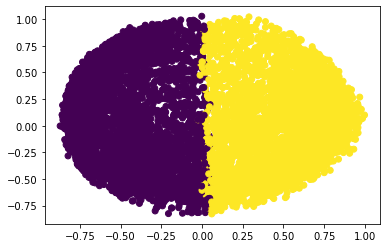

In [16]:
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

## Elbow method

In [17]:
Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Sum_of_squared_distances.append(km.inertia_)

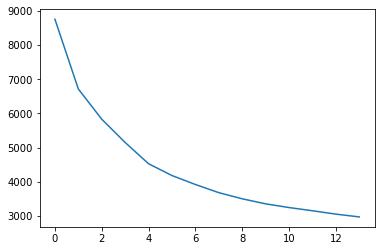

In [18]:
plt.plot(Sum_of_squared_distances);

Es ambiguo pero podemos determinar que el optimo es de 4 a 6 clusters; al agregar mas clusters no se obtendra ganancia significativa

## Silhouette method

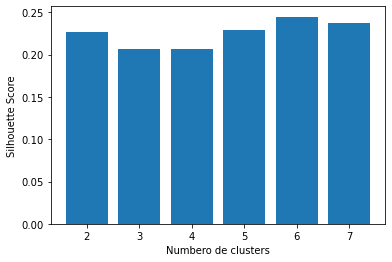

In [19]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = range(2,8)
plt.bar(k, silhouette_scores) 
plt.xlabel('Numbero de clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

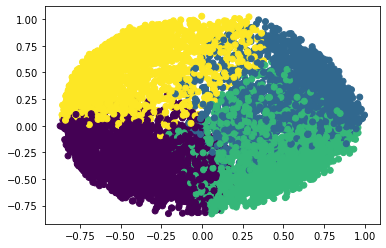

In [20]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

In [21]:
#Agregamos la etiqueta del cluster correspondiente
df["c"] = km.predict(normalized_df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,c
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,627.284787,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


In [22]:
import seaborn as sns

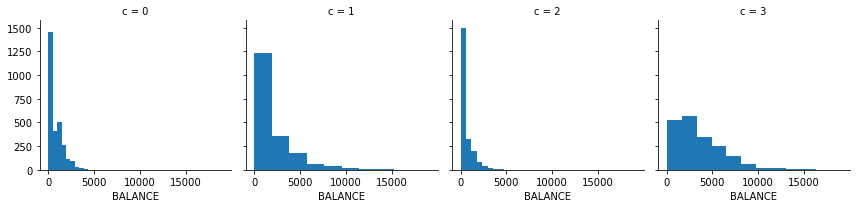

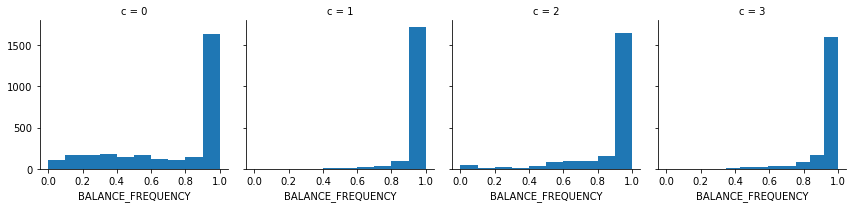

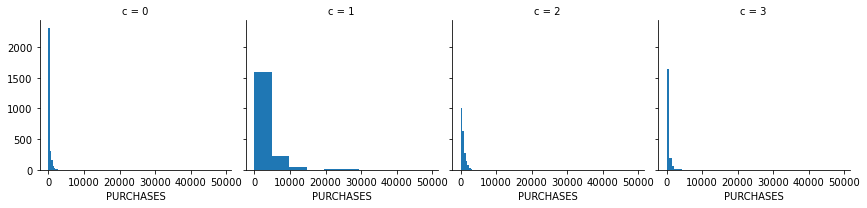

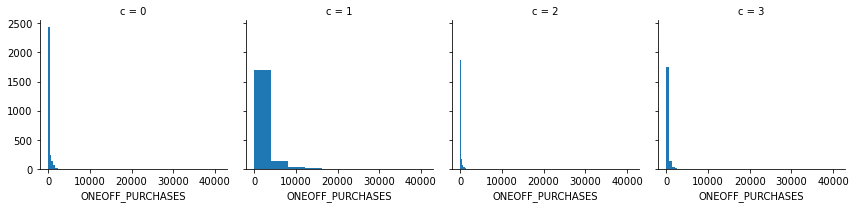

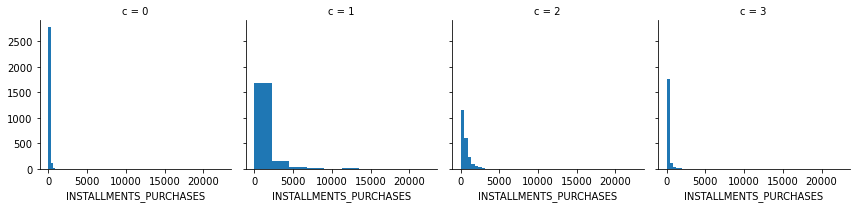

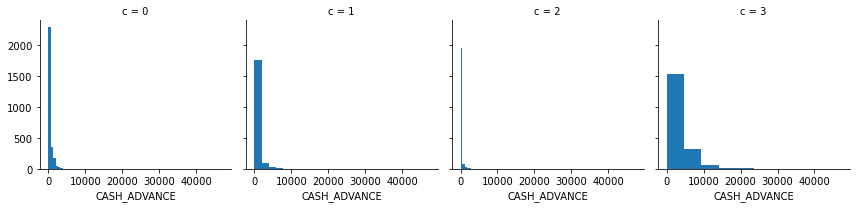

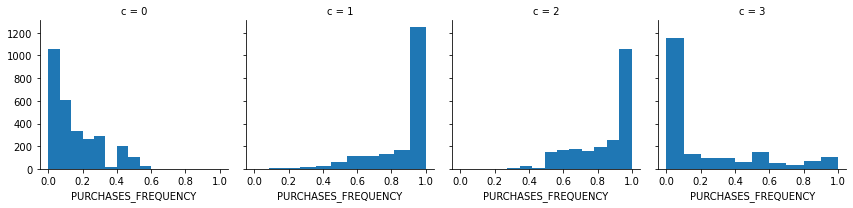

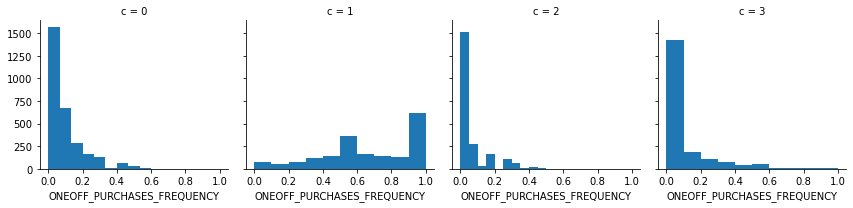

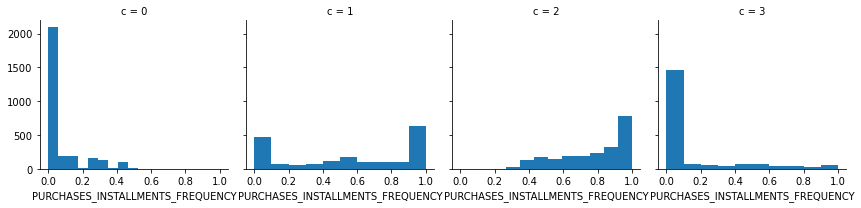

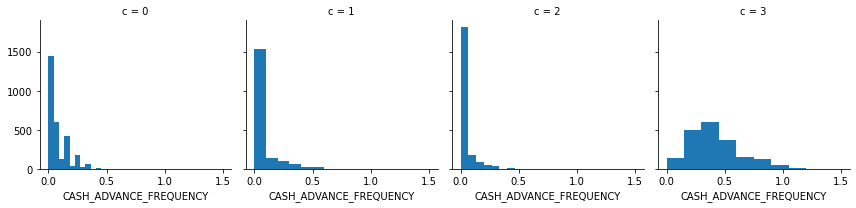

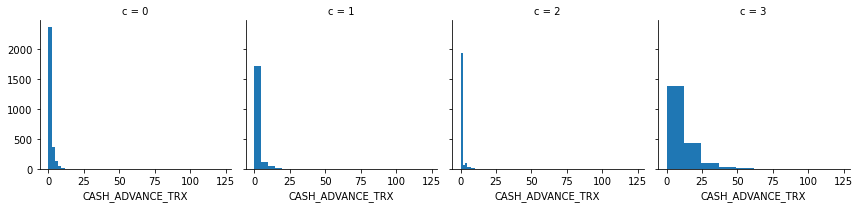

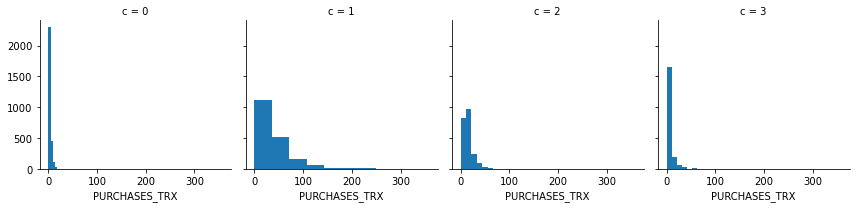

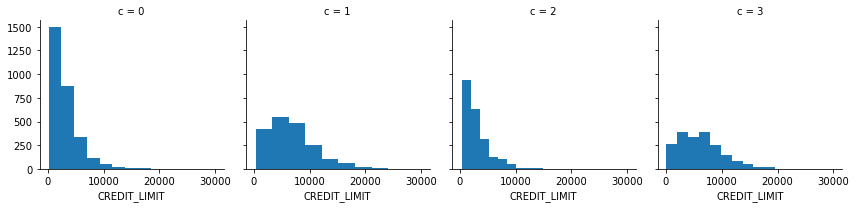

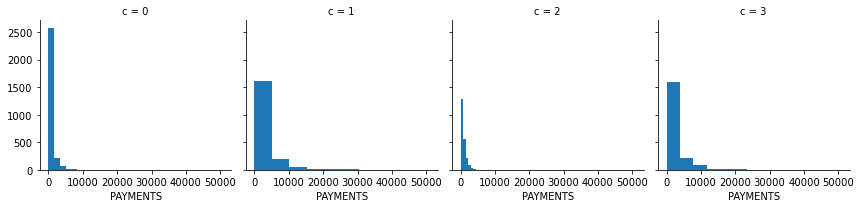

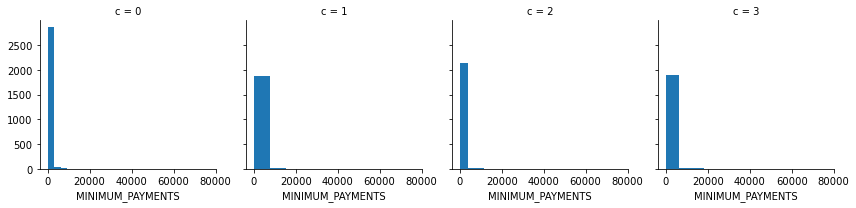

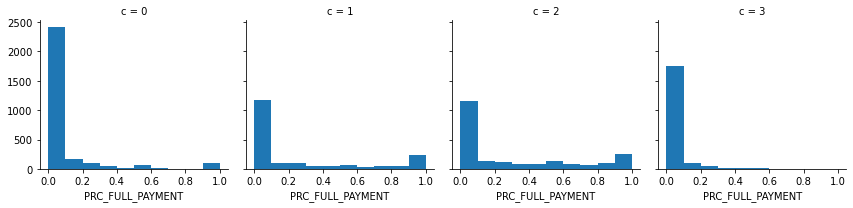

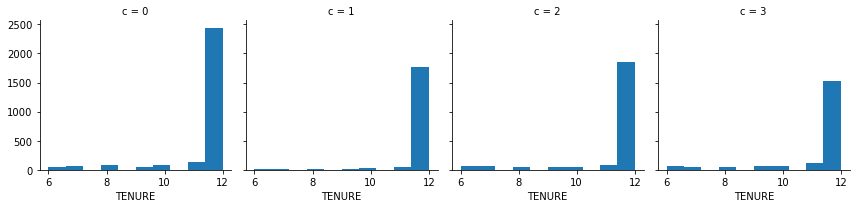

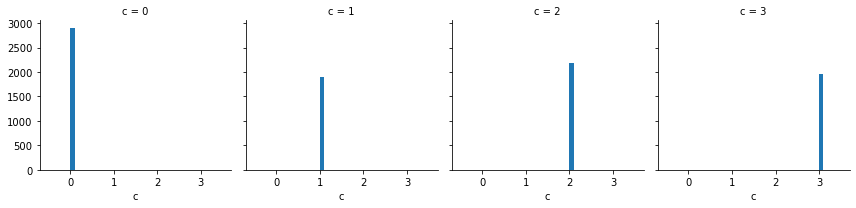

In [23]:
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

Las conclusiones observadas son:
- C0 : Son las personas que hacen gran uso de su crédito, por ello su límite de crédito es alto, no suelen comprar con frecuencia, y procuran no obtener financiamientos para obtener bienes.
- C1 : Son las personas que no suelen utilizar con regularidad su tarjeta de crédito del banco que  estamos analizando.
- C2 : Son las personas que utilizan frecuentemente su tarjeta de crédito, tienen muy buen balance, hacen compras frecuentes y en gran volumen, por lo tanto, también cuentan con un límite de crédito alto e incluso pueden comprar cosas por adelantado.
- C3 : Son las personas que tienen malos hábitos financieros por que suelen usar mucho su tarjeta aun sin tener el balance que lo respalde, realizan múltiples compras financiadas.